In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
from utils import *
import math
import copy
import matplotlib.pyplot as plt

In [82]:
train_data = pd.read_csv("Gotem Pumpkins.csv")
train_data = train_data.drop(['Unnamed: 0'],axis=1)
test_data = pd.read_csv("Freyja_Pumpkins.csv")
test_data = test_data.drop(['Unnamed: 0'],axis=1)

## Extracting Features and Target Variable

In [83]:
X_train = train_data.drop(columns='Class').values
y_train = train_data['Class'].values

X_test = test_data.drop(columns='Class').values
y_test = test_data['Class'].values

In [84]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

print ('The shape of X_test is: ' + str(X_test.shape))
print ('The shape of y_test s: ' + str(y_test.shape))

The shape of X_train is: (2000, 12)
The shape of y_train is: (2000,)
We have m = 2000 training examples
The shape of X_test is: (500, 12)
The shape of y_test s: (500,)


## Visualization

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Area,1.000000,0.930120,0.793882,0.689095,0.999798,0.998535,0.168770,0.169039,-0.003753,-0.145632,0.166356,-0.167291
Perimeter,0.930120,1.000000,0.948051,0.400400,0.931543,0.929545,0.469946,0.076395,-0.121404,-0.494012,0.491042,-0.488061
Major_Axis_Length,0.793882,0.948051,1.000000,0.112192,0.793849,0.792010,0.705272,0.126520,-0.193530,-0.677444,0.728367,-0.726363
Minor_Axis_Length,0.689095,0.400400,0.112192,1.000000,0.689401,0.693495,-0.579354,0.100111,0.226474,0.558198,-0.589740,0.593788
Convex_Area,0.999798,0.931543,0.793849,0.689401,1.000000,0.998332,0.168246,0.149451,-0.005233,-0.149988,0.166294,-0.167337
Equiv_Diameter,0.998535,0.929545,0.792010,0.693495,0.998332,1.000000,0.165596,0.171100,-0.000968,-0.141299,0.162392,-0.163466
Eccentricity,0.168770,0.469946,0.705272,-0.579354,0.168246,0.165596,1.000000,0.049416,-0.309382,-0.889274,0.951407,-0.981401
Solidity,0.169039,0.076395,0.126520,0.100111,0.149451,0.171100,0.049416,1.000000,0.067013,0.202458,0.025511,-0.020358
Extent,-0.003753,-0.121404,-0.193530,0.226474,-0.005233,-0.000968,-0.309382,0.067013,1.000000,0.329136,-0.308912,0.317763
Roundness,-0.145632,-0.494012,-0.677444,0.558198,-0.149988,-0.141299,-0.889274,0.202458,0.329136,1.000000,-0.935500,0.933523


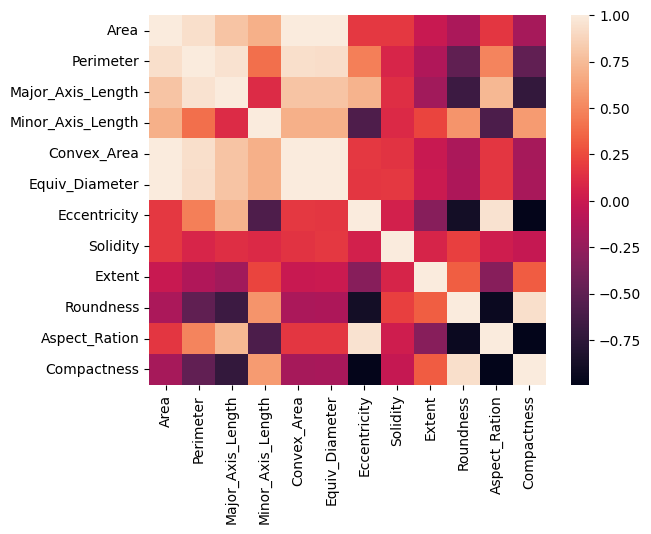

In [85]:
train_corr = train_data.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(train_corr)
# Area, Perimeter, Convex_Area and Equiv_Diameter are highly correlated therefore Perimeter, Convex_Area and Equiv_Diameter are dropped
# Eccentricity, Aspect_Ration and Compactness are highly correlated therefore Aspect_Ration and Compactness are dropped
train_corr


In [86]:
train_data=train_data.drop(['Perimeter','Convex_Area','Equiv_Diameter','Aspect_Ration','Compactness'],axis=1)
train_data['Class'] = train_data['Class'].map({'Çerçevelik':1,'Ürgüp Sivrisi':0})
train_data

,Area,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Solidity,Extent,Roundness,Class
0,84930,508.7883,213.0266,0.9081,0.9914,0.5482,0.7357,0
1,103343,521.4694,252.8941,0.8745,0.9922,0.7457,0.7985,0
2,98350,526.2346,238.4702,0.8914,0.9916,0.5919,0.7668,0
3,69517,429.8407,206.8250,0.8766,0.9862,0.6623,0.7782,1
4,80011,501.9065,204.7531,0.9130,0.9890,0.7374,0.7185,0
...,...,...,...,...,...,...,...,...
1995,68292,368.6867,237.1654,0.7656,0.9913,0.7212,0.8898,1
1996,82272,459.4482,228.2780,0.8678,0.9928,0.7321,0.8216,0
1997,72049,398.3945,230.5932,0.8155,0.9906,0.7638,0.8638,1
1998,73703,422.3591,223.3923,0.8487,0.9898,0.6380,0.8151,1


In [87]:
test_data['Class'] = test_data['Class'].map({'Çerçevelik':1,'Ürgüp Sivrisi':0})
test_data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,63011,961.163,371.5589,216.5940,63511,283.2456,0.8125,0.9921,0.7301,0.8571,1.7155,0.7623,1
1,75917,1069.411,420.2925,230.6208,76613,310.9028,0.8360,0.9909,0.7132,0.8342,1.8224,0.7397,1
2,75988,1091.948,447.6035,217.3051,76566,311.0481,0.8742,0.9925,0.7079,0.8008,2.0598,0.6949,0
3,85968,1168.743,479.1606,229.2326,87008,330.8442,0.8781,0.9880,0.7495,0.7909,2.0903,0.6905,1
4,85386,1138.193,438.2698,248.8453,86282,329.7224,0.8232,0.9896,0.7093,0.8283,1.7612,0.7523,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,96325,1305.855,551.3950,224.9857,97155,350.2068,0.9130,0.9915,0.5223,0.7098,2.4508,0.6351,0
496,97672,1245.298,512.0015,243.4767,98354,352.6469,0.8797,0.9931,0.6428,0.7915,2.1029,0.6888,0
497,74286,1119.418,469.9465,202.6598,75036,307.5449,0.9022,0.9900,0.7523,0.7450,2.3189,0.6544,0
498,85924,1113.974,428.2503,256.8931,86515,330.7595,0.8001,0.9932,0.7242,0.8701,1.6670,0.7724,1


## Normalization

Normalization is done to bring all the data to similarscale, eliminating mathematical disparity

In [88]:
X_train_min = X_train.min(axis=0)
X_train_max = X_train.max(axis=0)

mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean)/std
X_train

array([[ 2.32398734, -0.40728711, -0.42998075, ..., -0.44655432,
        -0.44650041, -0.44655724],
       [ 2.92465171, -0.40497707, -0.42956707, ..., -0.44655227,
        -0.44651106, -0.44655563],
       [ 2.76177129, -0.40516373, -0.42941163, ..., -0.44655331,
        -0.44650633, -0.44655638],
       ...,
       [ 1.90378651, -0.41318069, -0.43358199, ..., -0.44655014,
        -0.44652196, -0.44655352],
       [ 1.95774289, -0.41180418, -0.43280023, ..., -0.44655173,
        -0.44651664, -0.44655466],
       [ 1.98455798, -0.40895875, -0.43098258, ..., -0.44655535,
        -0.44650036, -0.4465573 ]])

In [89]:
test_data = test_data.drop(['Perimeter','Convex_Area','Equiv_Diameter','Aspect_Ration','Compactness'],axis=1)  
testmean = X_test.mean()
teststd = X_test.std()
X_test = (X_test - testmean)/teststd
X_test

array([[ 1.60818497, -0.41552781, -0.43475734, ..., -0.44684752,
        -0.44681953, -0.44685061],
       [ 2.02910529, -0.41199737, -0.43316792, ..., -0.44684827,
        -0.44681604, -0.44685135],
       [ 2.0314209 , -0.41126234, -0.4322772 , ..., -0.44684936,
        -0.4468083 , -0.44685281],
       ...,
       [ 1.97591134, -0.41036643, -0.43154849, ..., -0.44685118,
        -0.44679985, -0.44685413],
       [ 2.35547671, -0.41054398, -0.43290839, ..., -0.4468471 ,
        -0.44682111, -0.44685028],
       [ 1.72236768, -0.41237221, -0.43250368, ..., -0.44685112,
        -0.44680084, -0.44685394]])

Defining Sigmoid functon:

In [99]:
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

#defining function to compute total cost of all iterations
def compute_cost_reg_logistic(X, y, w, b, lambda_ = 1):
    m,n  = X.shape

    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)

    cost_without_reg = cost/m

    reg_cost = 0
    for j in range(n):
        reg_cost+= (w[j]**2)

    reg_cost = (lambda_/(2*m))*reg_cost

    total_cost = cost_without_reg + reg_cost
    
    return total_cost

def compute_gradient_reg(X, y, w, b, lambda_): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0

    for i in range(m):
        f_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_i - y[i]
        for j in range(n):
            dj_dw[j] += (err_i * X[i, j]) / m + (lambda_ / m) * w[j]
        dj_db += err_i / m
    
    return dj_db, dj_dw

In [115]:
def gradient_descent(X,y,binit,n_epochs, lambda_):
    m = len(y)
    t0, t1 = 5, 50 # learning schedule hyperparameters
    
    def learning_schedule(t):
        return t0 / (t + t1)
    
    b = binit
    w = np.random.randn(X.shape[1],1) # random initialization
    J_history = []
    w_history = []

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            gradients_b, gradients_w = compute_gradient_reg(xi, yi, w, b, lambda_)
            alpha = learning_schedule(epoch * m + i)
            b -= alpha * gradients_b.mean()
            w -= alpha * gradients_w

        # Save cost J at each iteration
        if epoch<100000:      # prevent resource exhaustion 
            cost =  compute_cost_reg_logistic(xi, yi, w, b, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if epoch% math.ceil(n_epochs/10) == 0 or epoch == (n_epochs-1):
            w_history.append(w)
            print(f"Iteration {epoch:4}: Cost {J_history[-1].item():8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [117]:
# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
n_epochs = 1000
y_train = train_data['Class'].values

w,b, J_history,w_history = gradient_descent(X_train, y_train, 0, n_epochs, lambda_)


Iteration    0: Cost     0.75   
Iteration  100: Cost     0.80   
Iteration  200: Cost     0.78   
Iteration  300: Cost     0.63   
Iteration  400: Cost     0.60   
Iteration  500: Cost     0.99   
Iteration  600: Cost     0.53   
Iteration  700: Cost     0.54   
Iteration  800: Cost     0.63   
Iteration  900: Cost     0.81   
Iteration  999: Cost     0.58   


In [ ]:
# Plot the cost function
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function during Gradient Descent')

# Plot the trajectory of the weights
plt.subplot(1, 2, 2)
w_history_array = np.array(w_history)
for i in range(w_history_array.shape[1]):  # Iterate through all weights
    plt.plot(range(0, len(w_history_array)), w_history_array[:, i], label=f'Weight {i+1}')

plt.xlabel('Iterations')
plt.ylabel('Weight Values')
plt.title('Movement of Weights during Gradient Descent')
plt.legend()

plt.tight_layout()
plt.show()
